In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
#palettes
sns.color_palette("magma", as_cmap=True)
sns.color_palette("cubehelix", as_cmap=True)
sns.color_palette("flare", as_cmap=True)
sns.color_palette("viridis", as_cmap=True)

On commence par importer nos bases de données sur lesquelles nous allons faire nos calculs.

In [ ]:
df_oct = pd.read_csv("matchs_octobre.csv",index_col = 0)
for col in df_oct.columns[:-1]:
    df_oct[col] = df_oct[col].apply(lambda x: eval(x))
df_nov = pd.read_csv("matchs_novembre.csv",index_col = 0)
for col in df_nov.columns[:-1]:
    df_nov[col] = df_nov[col].apply(lambda x: eval(x))

On note la liste de tous les champions du jeu.

In [49]:
champ_list = ['Nilah',
 'Renata',
 'Belveth',
 'Aatrox',
 'Ahri',
 'Akali',
 'Akshan',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'Draven',
 'DrMundo',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'FiddleSticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Gwen',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'KSante',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lillia',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Qiyana',
 'Quinn',
 'Rakan',
 'Rammus',
 'RekSai',
 'Rell',
 'Renekton',
 'Rengar',
 'Riven',
 'Rumble',
 'Ryze',
 'Samira',
 'Sejuani',
 'Senna',
 'Seraphine',
 'Sett',
 'Shaco',
 'Shen',
 'Shyvana',
 'Singed',
 'Sion',
 'Sivir',
 'Skarner',
 'Sona',
 'Soraka',
 'Swain',
 'Sylas',
 'Syndra',
 'TahmKench',
 'Taliyah',
 'Talon',
 'Taric',
 'Teemo',
 'Thresh',
 'Tristana',
 'Trundle',
 'Tryndamere',
 'TwistedFate',
 'Twitch',
 'Udyr',
 'Urgot',
 'Varus',
 'Vayne',
 'Veigar',
 'Velkoz',
 'Vex',
 'Vi',
 'Viego',
 'Viktor',
 'Vladimir',
 'Volibear',
 'Warwick',
 'Xayah',
 'Xerath',
 'XinZhao',
 'Yasuo',
 'Yone',
 'Yorick',
 'Yuumi',
 'Zac',
 'Zed',
 'Ziggs',
 'Zilean',
 'Zoe',
 'Zyra',
 'Zeri']

### Quels sont les champions les plus joués au Top ?

In [4]:
#On compte combien de fois on retrouve chaque champion à chaque rôle pour les 2 mois
compteur = np.zeros([10,len(champ_list)], dtype = int)
for i in range(10) :
    for j in df_oct[df_oct.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

for i in range(10) :
    for j in df_nov[df_nov.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

#On note les 10 champions les plus joués au Top
champ_top = compteur[0] + compteur[5]
lst = pd.Series(champ_top)
most_played = lst.nlargest(10)
Top_champ = [champ_list[i] for i in most_played.index]

#On met ça sous la forme d'un DataFrame
df_bt = pd.DataFrame(most_played*100 / sum(compteur[0]))
df_bt["Champion"] = Top_champ
df_bt = df_bt.rename(columns = {0 : "Taux de présence"})

#Quels sont les champions les plus joués?
pd.DataFrame({"Champion" : Top_champ, "Nombre de parties" : most_played}).set_index("Champion")

,Nombre de parties
Champion,
Aatrox,922
Ornn,772
Fiora,766
Darius,732
Jax,686
Camille,629
Shen,621
Riven,525
Garen,497


### Quels sont les 10 champions qui ont le meilleur taux de victoire contre Aatrox?

In [7]:
BAa_Opponent = []
BAa_Outcome = []
RAa_Opponent = []
RAa_Outcome = []

#On regarde contre qui est tombé Aatrox et combien de fois il a affronté quel champion en octobre, puis en novembre
for i in range(df_oct.shape[0]) :
    if df_oct.iloc[i][0][1] == "Aatrox" :
        BAa_Opponent.append(df_oct.iloc[i][5][1])
        BAa_Outcome.append(df_oct.iloc[i][10])
    if df_oct.iloc[i][5][1] == "Aatrox" :
        RAa_Opponent.append(df_oct.iloc[i][0][1])
        RAa_Outcome.append(df_oct.iloc[i][10])

for i in range(df_nov.shape[0]) :
    if df_nov.iloc[i][0][1] == "Aatrox" :
        BAa_Opponent.append(df_nov.iloc[i][5][1])
        BAa_Outcome.append(df_nov.iloc[i][10])
    if df_nov.iloc[i][5][1] == "Aatrox" :
        RAa_Opponent.append(df_nov.iloc[i][0][1])
        RAa_Outcome.append(df_nov.iloc[i][10])


#On compte combien de fois Aatrox a gagné ou perdu contre chaque champion, 
#comme ça on pourra calculer son taux de victoire
compt_aa = np.zeros(len(champ_list))
compt_win = np.zeros(len(champ_list))

for i in range(len(BAa_Opponent)) :
    compt_aa[champ_list.index(BAa_Opponent[i])] += 1
    if BAa_Outcome[i] == False :
        compt_win[champ_list.index(BAa_Opponent[i])] += 1
for i in range(len(RAa_Opponent)) :
    compt_aa[champ_list.index(RAa_Opponent[i])] += 1
    if RAa_Outcome[i] == True :
        compt_win[champ_list.index(RAa_Opponent[i])] += 1


#On note les 10 match-up les plus fréquents et on calcule son taux de victoire
lst_aa = pd.Series(compt_aa)
most_played_aa = lst_aa.nlargest(10)
Aa_opposant = [champ_list[i] for i in most_played_aa.index]
Aa_win_ratio = [compt_win[i]*100/compt_aa[i] for i in most_played_aa.index]
Aa_opp_nb_part = [compt_aa[i] for i in most_played_aa.index]
Aa_opp_tx_pres = [(compt_aa*100 / sum(compt_aa))[i] for i in most_played_aa.index]

#On met sous la forme d'un df
df_aatrox = pd.DataFrame({ "Opposant" : Aa_opposant, "Nombres de parties" : Aa_opp_nb_part, "Taux de présence" : Aa_opp_tx_pres, "Taux de Victoire" : Aa_win_ratio})
df_aatrox.head()

,Opposant,Nombres de parties,Taux de présence,Taux de Victoire
0,Ornn,60.0,6.507592,48.333333
1,Fiora,56.0,6.073753,41.071429
2,Darius,52.0,5.639913,48.076923
3,Camille,48.0,5.206074,52.083333
4,Jax,42.0,4.555315,50.000000


### Le taux de victoire des 10 champions les plus joués 

In [10]:
#On regarde les statistiques générales de victoire de Aatrox
stats_aa = 100 - compt_win[compt_aa > 0]*100/compt_aa[compt_aa > 0]
pd.DataFrame({"Opposant" : np.array(champ_list)[compt_aa > 0], "Taux de victoire" : stats_aa}).describe()

,Taux de victoire
count,81.000000
mean,48.655067
std,29.120307
min,0.000000
25%,33.333333
50%,50.000000
75%,66.666667
max,100.000000


Il a donc un taux de victoire moyen de 48,7% contre ces 10 champions les plus populaires, ce qui est inférieur à 50%, on a donc plus tendance à perdre des parties en jouant Aatrox.

In [ ]:
taux_vict = np.zeros(len(Top_champ), dtype = int)

#Le principe du code est le suivant:
#On parcourt bêtement les Dataframe d'octobre et novembre sur les colonnes BlueTop et RedTop,
#On regarde si le champion sur lequel on tombre fait parti des 10 les plus populaires,
#Le cas échéant, on lui attribut une victoire
for i in range(df_oct.shape[0]) :
    try :
        index = Top_champ.index(df_oct.iloc[i][0][1])
        if df_oct.iloc[i][10] == True :
            taux_vict[index] += 1
    except ValueError :
        pass
    try :
        index = Top_champ.index(df_oct.iloc[i][5][1])
        if df_oct.iloc[i][10] == False :
            taux_vict[index] += 1
    except ValueError :
        continue

for i in range(df_nov.shape[0]) :
    try :
        index = Top_champ.index(df_nov.iloc[i][0][1])
        if df_nov.iloc[i][10] == True :
            taux_vict[index] += 1
    except ValueError :
        pass
    try :
        index = Top_champ.index(df_nov.iloc[i][5][1])
        if df_nov.iloc[i][10] == False :
            taux_vict[index] += 1
    except ValueError :
        continue

df_wr = pd.DataFrame({"Champion" : Top_champ, "Taux de Victoire" : taux_vict*100/most_played})
df_wr.set_index("Champion")

,Taux de Victoire
Champion,
Aatrox,49.566161
Ornn,48.575130
Fiora,53.394256
Darius,54.918033
Jax,51.749271
Camille,50.397456
Shen,53.945250
Riven,54.285714
Garen,50.503018


Pour l'instant, on peut supposer qu'il n'y a pas de corrélation entre popularité d'un champion et son taux de victoire.

### Y a-t-il corrélation entre la popularité d'un champion en général et son winrate ?

In [14]:
wr_tot = np.zeros(len(champ_list), dtype = int)

#Le principe de ce code est le même que le précédant mais on parcours cette fois l'intégralité des DataFrames
for i in range(df_oct.shape[0]) :
    if df_oct.iloc[i][10] == True :
        for j in range(5) :
            index = champ_list.index(df_oct.iloc[i][j][1])
            wr_tot[index] += 1
    else :
        for j in range(5) :
            index = champ_list.index(df_oct.iloc[i][5+j][1])
            wr_tot[index] += 1

for i in range(df_nov.shape[0]) :
    if df_nov.iloc[i][10] == True :
        for j in range(5) :
            index = champ_list.index(df_nov.iloc[i][j][1])
            wr_tot[index] += 1
    else :
        for j in range(5) :
            index = champ_list.index(df_nov.iloc[i][5+j][1])
            wr_tot[index] += 1

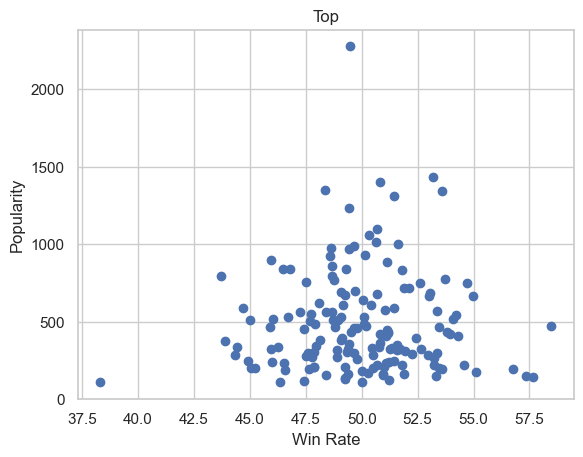

In [15]:
#On cherche maintenant à représenter tout cela
champ_game_played = np.zeros(len(compteur[0]), dtype = int)
for i in range(10) :
    champ_game_played += compteur[i]

wr_100 = wr_tot[champ_game_played>100]*100/champ_game_played[champ_game_played>100]
champ_100 = champ_game_played[champ_game_played>100]
    
plt.scatter(wr_100,champ_100)

plt.title("Top")

plt.xlabel('Win Rate')
plt.ylabel('Popularity')

plt.show()

In [16]:
from scipy.stats import pearsonr

corr, _ = pearsonr(wr_100, champ_100)
print ("Le test de correlation de Pearson donne une valeur de ", round(corr,2))

Le test de correlation de Pearson donne une valeur de  0.02


In [50]:
df_wr_games = pd.DataFrame({"Win Rate" : wr_tot*100/champ_game_played, "Nombre de parties" : champ_game_played}, index = champ_list)
df_wr_games.describe()

,Win Rate,Nombre de parties
count,162.000000,162.000000
mean,49.779463,473.950617
std,3.517044,333.491650
min,35.135135,35.000000
25%,47.938717,230.250000
50%,49.794565,392.000000
75%,51.578447,618.750000
max,62.857143,2275.000000


Ici, on peut simplement voir que la popularité entre les champions est très varié.